In [1]:
# Doing my imports
!pip install pymysql
import pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.0 MB/s eta 0:00:00


In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans

In [3]:
# MySQL connection code
connection = pymysql.connect(
host = "dsc140.cmgtlybtlnmh.us-east-2.rds.amazonaws.com",
user = "guest",
password = "UMUdsc140",
db="autos")

conn = connection.cursor()

In [5]:
sql = "SHOW COLUMNS FROM mpg"
# execute the command we defined above and get the output
output = conn.execute(sql)
vals = conn.fetchall()

# Making list for appending future values
col_names = []

# For loop to add columns for the dataframe
for i in vals:
    col_names.append(i[0])

sql = "SELECT Quanity FROM orderdetails"

# SQL COMMANDS (temp is vals)
sql = "SELECT * FROM mpg"
# execute the command we defined above and get the output
output = conn.execute(sql)
vals = conn.fetchall()

# Making thy dataframe
data = pd.DataFrame(vals,columns=col_names)

In [6]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27,4,140,86,2790,15.6,82,1,ford mustang gl
388,44,4,97,52,2130,24.6,82,2,vw pickup
389,32,4,135,84,2295,11.6,82,1,dodge rampage
390,28,4,120,79,2625,18.6,82,1,ford ranger


In [7]:
# Ignore this... I wanna keep it incase I need it. data_pt = pd.pivot_table(data, values="mpg",columns=["model year"],aggfunc="mean")

In [28]:
def plot_correlation_and_fit(x_col, y_col, x_label, y_label, title):

    """
    Creates a scatter plot with a line of best fit for two variables and displays the correlation score, slope, and intercept.

    Arguments:
        x_col (str): The column name for the x-axis variable.
        y_col (str): The column name for the y-axis variable.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title for the plot.

    Returns:
        None
    """

    # Extract the data
    x = data[x_col]
    y = data[y_col]

    # Calculate the correlation, slope, and intercept
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

    # Line of best fit
    best_fit_line = slope * x + intercept

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='Data Points', color='blue')
    plt.plot(x, best_fit_line, label=f'Best Fit Line (y={slope:.2f}x + {intercept:.2f})', color='red')
    plt.title(f"{title}\nCorrelation Coefficient: {r_value:.2f}", fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

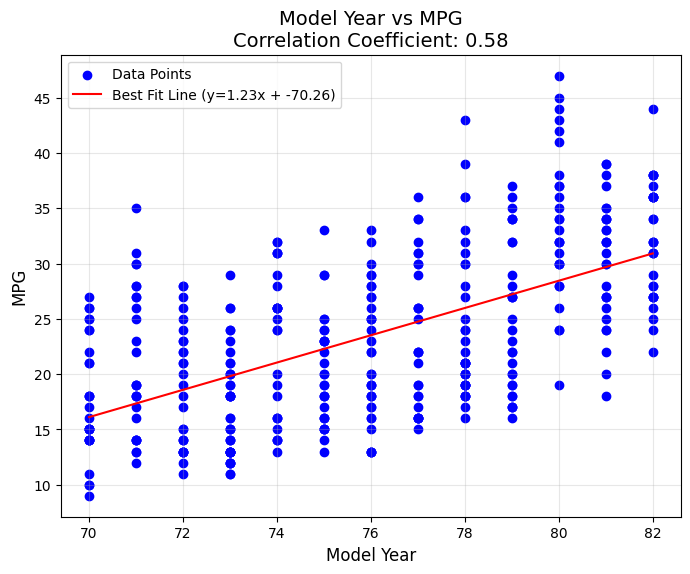

In [29]:
# Plot 1: Model Year vs MPG
plot_correlation_and_fit('model year', 'mpg', 'Model Year', 'MPG', 'Model Year vs MPG')

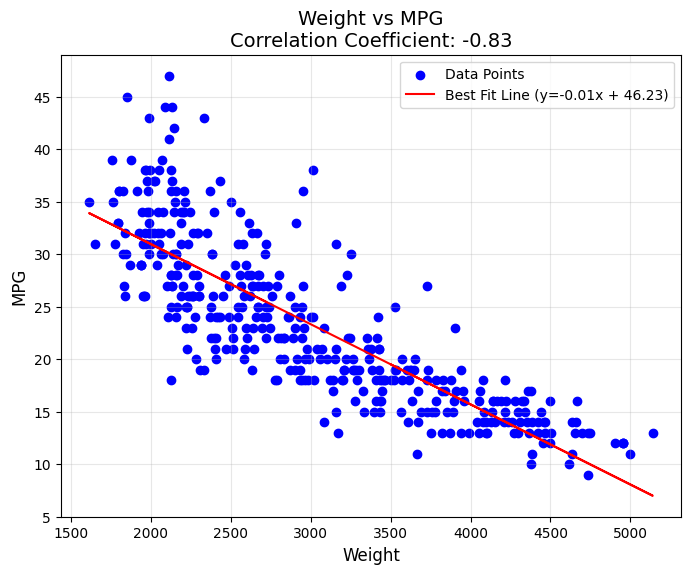

In [30]:
# Plot 2: Weight vs MPG
plot_correlation_and_fit('weight', 'mpg', 'Weight', 'MPG', 'Weight vs MPG')

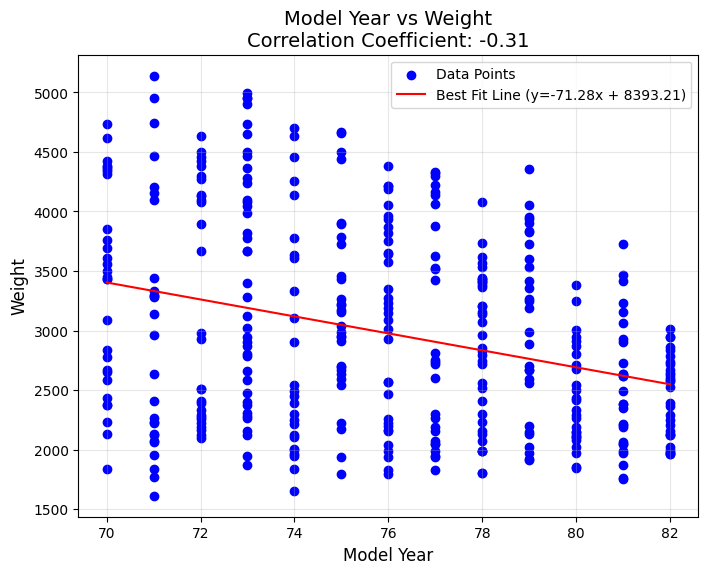

In [32]:
# Plot 3: Model Year vs Weight
plot_correlation_and_fit('model year', 'weight', 'Model Year', 'Weight', 'Model Year vs Weight')

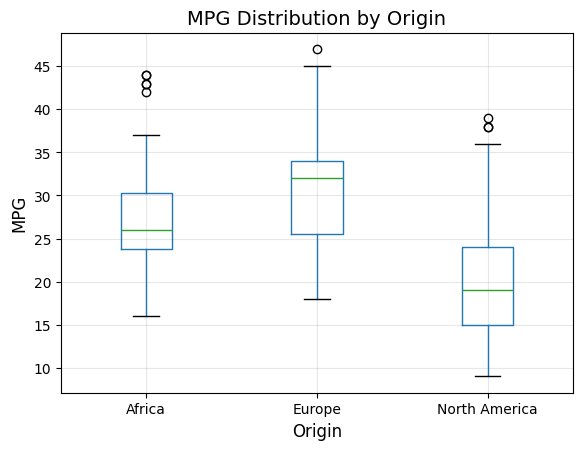

In [42]:
# Part 3

# NA,Africa,Europe

def smallmapper(x):
  '''
  A mapping function that returns a value dependent on what the passed arguement is.
  Arguements:
    x (float or int): Variable used to loop through the catagories of CASH_ADVANCE TO SORT THEM ACCORDINGLY
  Returns:
    North America,Africa,Europe (str): Returns a countries dendant on what X equals
  '''
  if x == 1:
    return "North America"
  elif x == 2:
    return "Africa"
  elif x == 3:
    return "Europe"

# Converting the orgin catagory into a new catagory with the correct translated orgin codes.
data["origin-cat"] = data["origin"].map(lambda x:smallmapper(x))

# Create the plot using 'origin' for the categorical grouping
data.boxplot(column='mpg', by='origin-cat')

# Set titles and labels
plt.title('MPG Distribution by Origin', fontsize=14)
plt.suptitle("")  # Suppress the automatic subtitle
plt.xlabel('Origin', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

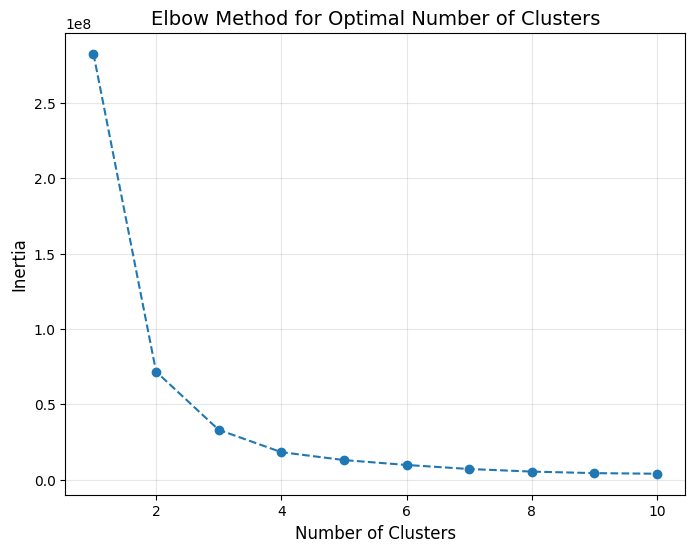

In [65]:
# Select features for clustering (e.g., 'mpg', 'weight', 'horsepower')
features = ['mpg', 'weight', 'horsepower']
X = data[features]

# Determine the optimal number of clusters using the Elbow Method
inertia = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Choose optimal number of clusters (based on the plot)
clusters = 4  # Adjust based on the plot
kmeans = sklearn.cluster.KMeans(n_clusters=clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

In [64]:
# Prepare data for KNN (using original features, no scaling)
X = data[features]
y = data['cluster']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# Calculate Accuracy manually
correct = sum(y_pred == y_test)
accuracy = correct / len(y_test)
print("Accuracy:",accuracy)

# Manually calculate Precision (as a percentage)
correct_predictions = np.sum(y_pred == y_test)  # Count of correct predictions
precision = (correct_predictions / len(y_test)) * 100  # Precision in percentage
print("Precision:",precision)

# !!! Not sure if it suppose to be 100% but I don't know what I did wrong otherwise. If you can provide feedback as to why it says 100% (unless its suppose to) !!!

Accuracy: 1.0
Precision: 100.0
